# Prediction of diagnosis of Cervical Cancer using ML

## Problem Statement

This project aims to predict the risk of cervical cancer in individuals based on demographic information, habits, and historic medical records. The goal is to build a predictive model utilizing multiple classification models. The dataset includes features such as age, number of sexual partners, pregnancy history, smoking habits, STD records, and other demographic details. The objective is to create a robust predictive model that can identify potential indicators or risks associated with cervical cancer.

## About this dataset

The cervical cancer dataset contains indicators and risk factors for predicting whether a woman will get cervical cancer. The features include demographic data (such as age), lifestyle, and medical history. The data can be downloaded from the UCI Machine Learning repository and is described by Fernandes, Cardoso, and Fernandes (2017).

#### Attributes

 - Age in years
 - Number of sexual partners
 - First sexual intercourse (age in years)
 - Number of pregnancies
 - Smoking yes or no
 - Smoking (in years)
 - Hormonal contraceptives yes or no
 - Hormonal contraceptives (in years)
 - Intrauterine device yes or no (IUD)
 - Number of years with an intrauterine device (IUD)
 - Has patient ever had a sexually transmitted disease (STD) yes or no
 - Number of STD diagnoses
 - Time since first STD diagnosis
 - Time since last STD diagnosis
 - The biopsy results “Healthy” or “Cancer”. Target outcome.

The biopsy serves as the gold standard for diagnosing cervical cancer.

## Dataset attributions

This dataset was obtained from: Kelwin Fernandes, Jaime Cardoso, Jessica Fernandes (2017). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
from scipy.io import arff

In [2]:
f_zip = 'https://archive.ics.uci.edu/static/public/383/cervical+cancer+risk+factors.zip'
r = requests.get(f_zip, stream=True)
cervical_zip = zipfile.ZipFile(io.BytesIO(r.content))
cervical_zip.extractall()

In [3]:
cancer_df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [4]:
cancer_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Exploring the data

In [5]:
cancer_df.shape

(858, 36)

In [6]:
cancer_df.columns.values

array(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'], dtype=object)

We can see the 36 features, and the target column is named **Biopsy**.

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Fom the data, we can see that there are lot of '?'. 

We are going to replace the '?' values with NaN so we can work on them later either by dropping them or replacing them with other values.

In [8]:
cancer_df = cancer_df.replace('?', np.nan)

We observed that there are a lot of NaN values in some columns like 'STDs:cervical condylomatosis', 'STDs:AIDS','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis' and unnecesary columns like 'Hinselmann', 'Schiller', and 'Citology'.

So we dropped those columns.

In [9]:
cancer_df = cancer_df.drop(['STDs:cervical condylomatosis','STDs:AIDS','STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Hinselmann', 'Schiller', 'Citology'], axis=1)

Converting the column data types, from object to numeric in order to perform Statistical Analysis of the Data

In [10]:
cancer_df = cancer_df.apply(pd.to_numeric)
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

As there are a lot of NULL/NaN values, we are going to replace those with zero

In [11]:
cancer_df =  cancer_df.fillna(0)

In [12]:
cancer_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.451049,16.856643,2.127040,0.143357,1.201241,0.446278,0.560606,1.972394,0.096737,...,0.001166,0.020979,0.001166,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.064103
std,8.497948,1.698528,3.183491,1.508108,0.350641,4.060623,2.210351,0.496603,3.597888,0.295771,...,0.034139,0.143398,0.034139,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We will check the Correlation between the attributes in our dataset

In [13]:
corr_matrix = cancer_df.corr()
corr_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
Age,1.000000,0.087669,0.300110,0.491076,0.057204,0.218261,0.131861,0.116499,0.298892,0.279429,...,0.000722,0.005009,-0.027433,0.040861,-0.001606,0.110340,0.061443,0.101722,0.092635,0.055956
Number of sexual partners,0.087669,1.000000,-0.117289,0.081464,0.236128,0.172862,0.174271,0.029114,0.032282,0.043116,...,0.031169,0.013803,-0.009076,0.015631,0.057156,0.028175,0.019817,0.032966,0.029875,0.003342
First sexual intercourse,0.300110,-0.117289,1.000000,-0.019291,-0.108053,-0.055023,-0.056013,0.053109,0.043469,0.004831,...,-0.009197,-0.001072,0.012276,0.032563,0.000911,0.065385,-0.024126,0.044937,0.038746,0.017774
Num of pregnancies,0.491076,0.081464,-0.019291,1.000000,0.071437,0.164004,0.085327,0.150964,0.216538,0.186925,...,0.042448,0.014640,-0.025543,-0.020109,0.042125,0.047014,-0.069399,0.057805,-0.018988,0.015826
Smokes,0.057204,0.236128,-0.108053,0.071437,1.000000,0.723572,0.493843,-0.006397,0.040917,-0.055115,...,-0.013974,0.056151,0.083503,0.049193,0.090725,-0.013470,-0.042119,0.009737,-0.069396,0.028724
Smokes (years),0.218261,0.172862,-0.055023,0.164004,0.723572,1.000000,0.724320,-0.000290,0.052436,0.027492,...,-0.010111,0.088930,0.099313,0.051201,0.078303,0.052859,-0.030476,0.055398,-0.050213,0.061204
Smokes (packs/year),0.131861,0.174271,-0.056013,0.085327,0.493843,0.724320,1.000000,0.014806,0.043803,0.008226,...,-0.006901,0.053995,0.101342,-0.008015,0.029912,0.107229,-0.020800,0.109118,-0.034270,0.024487
Hormonal Contraceptives,0.116499,0.029114,0.053109,0.150964,-0.006397,-0.000290,0.014806,1.000000,0.485621,0.083174,...,-0.038584,-0.067033,-0.038584,0.042793,-0.023652,0.047668,-0.001048,0.047668,0.007768,0.049535
Hormonal Contraceptives (years),0.298892,0.032282,0.043469,0.216538,0.040917,0.052436,0.043803,0.485621,1.000000,0.115456,...,-0.018737,-0.035063,-0.018737,0.054142,-0.025662,0.064993,0.003972,0.066509,-0.008054,0.097937
IUD,0.279429,0.043116,0.004831,0.186925,-0.055115,0.027492,0.008226,0.083174,0.115456,1.000000,...,-0.011179,0.007118,-0.011179,-0.015819,0.035791,0.117166,0.043708,0.062142,0.135778,0.059231


Plotted the Heatmap for the correlation matrix

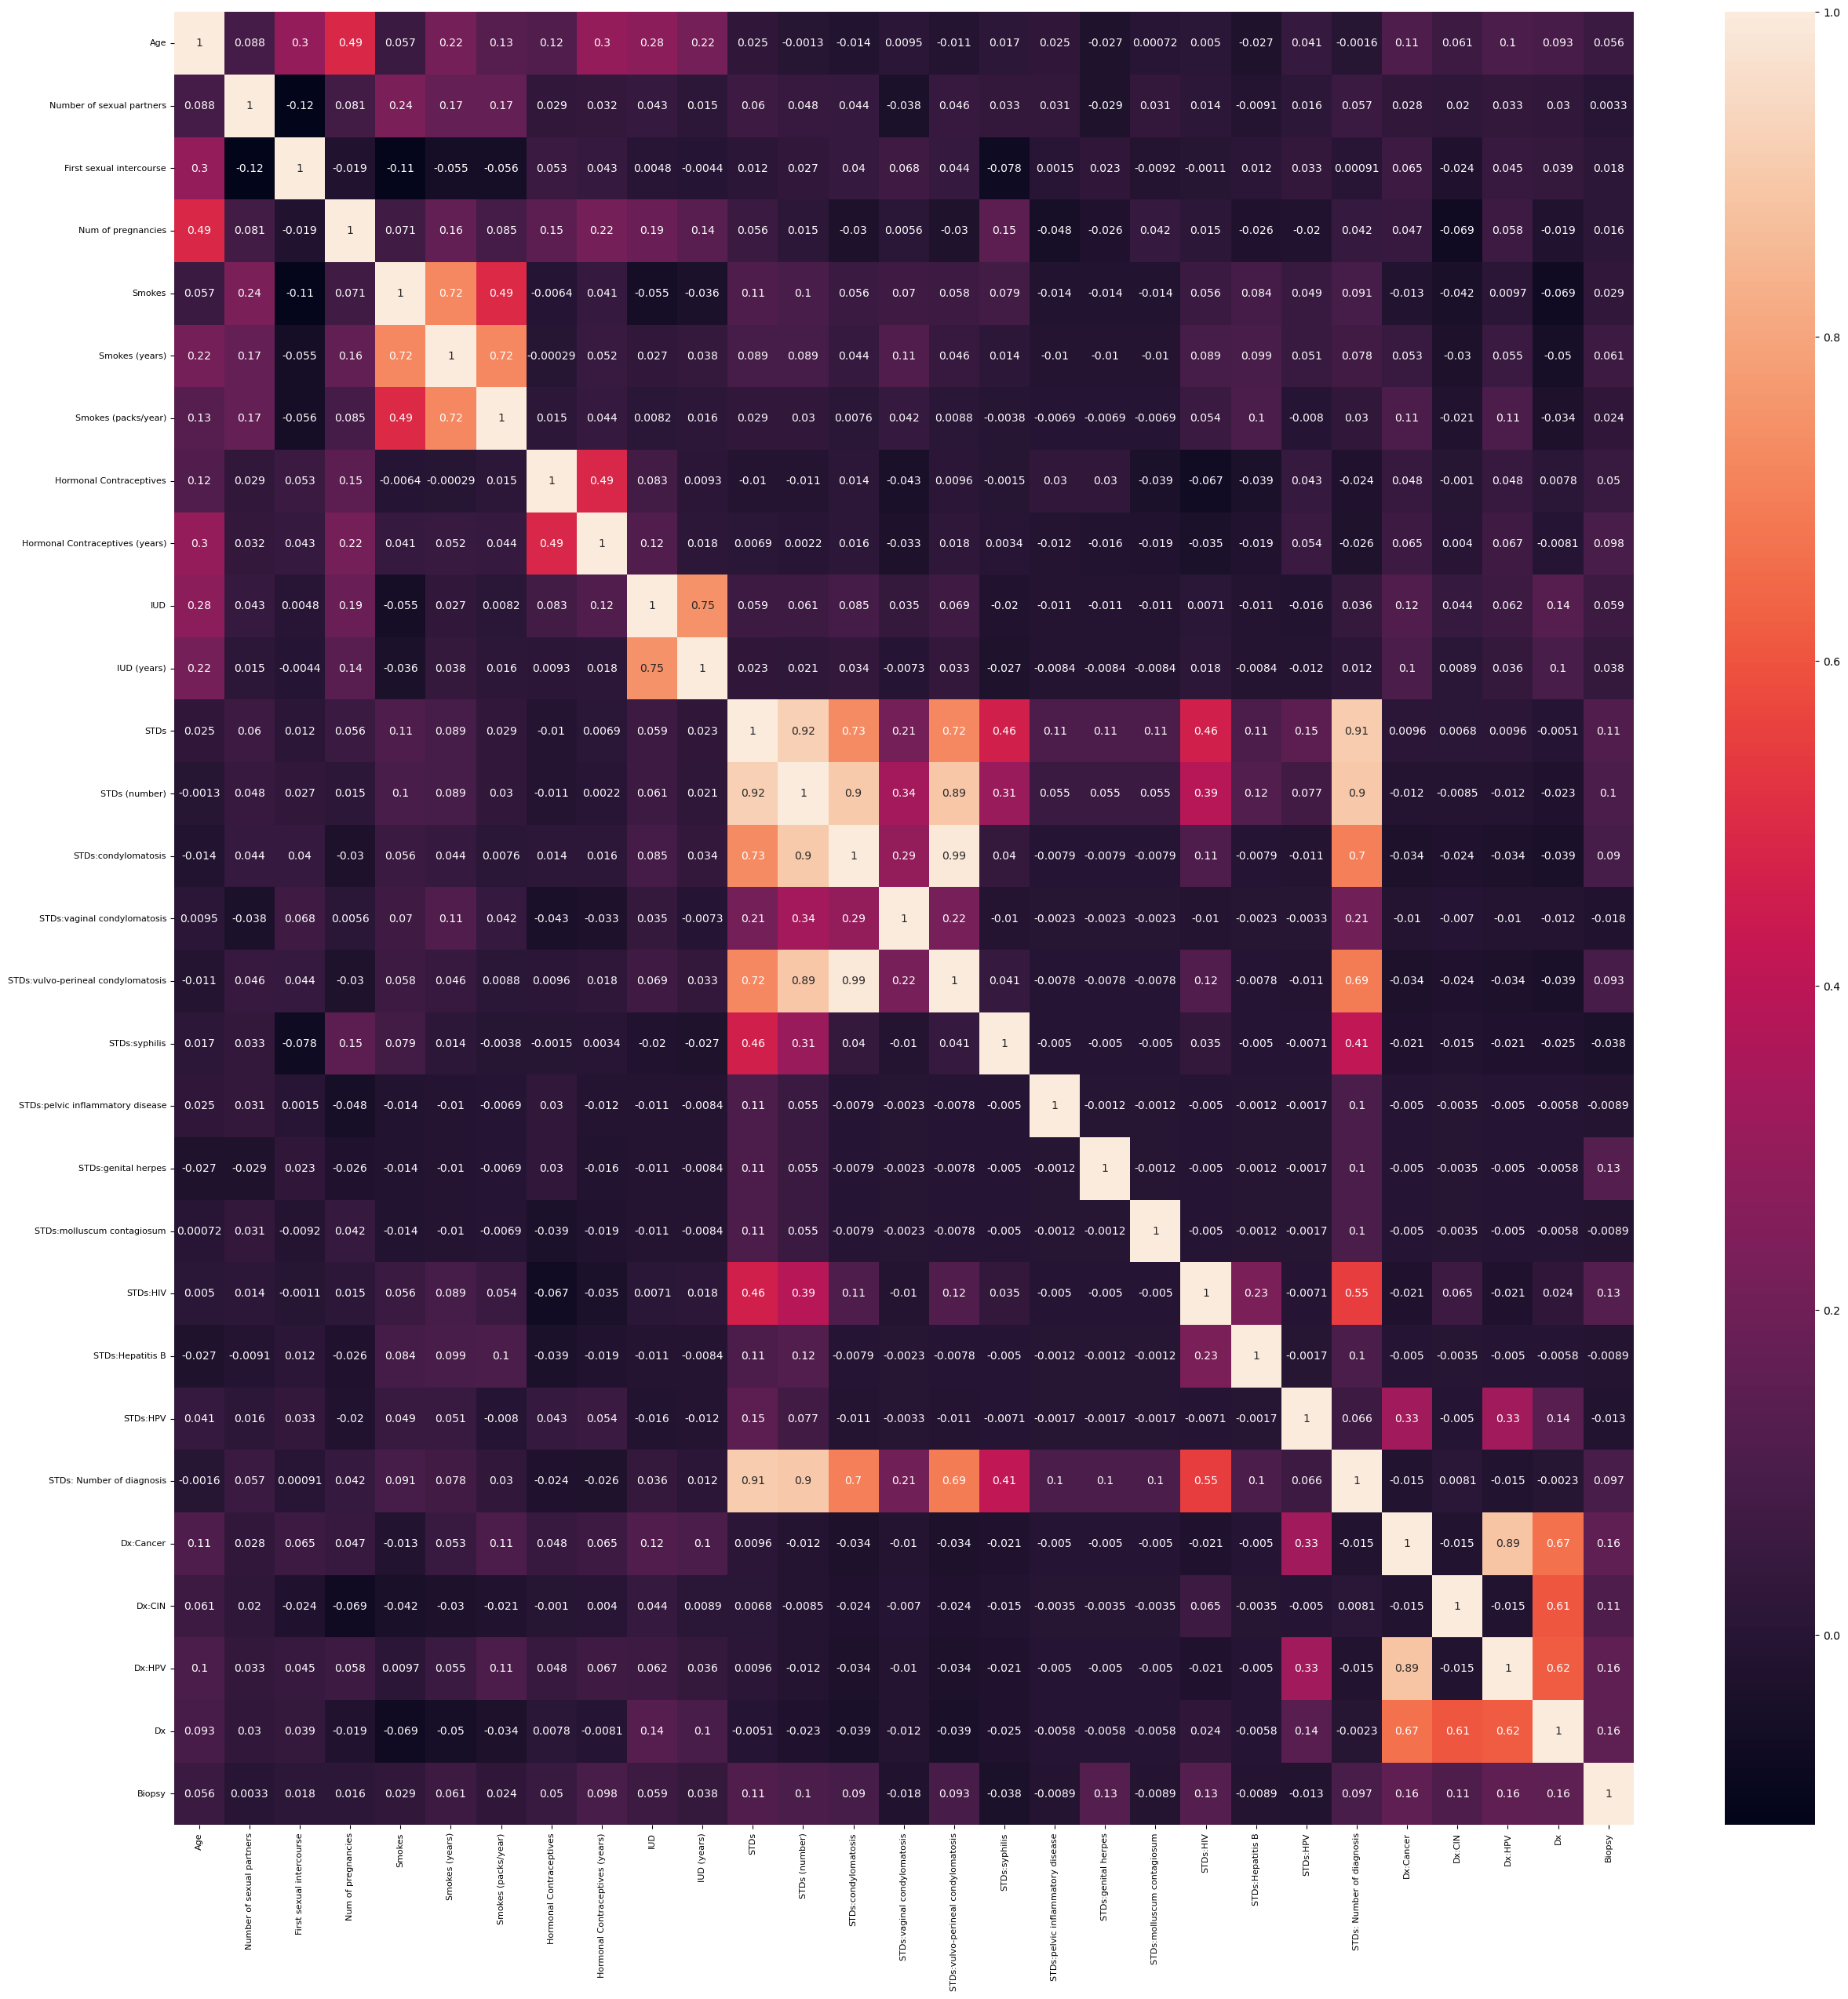

In [14]:
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.tick_params(labelsize=8)
plt.show()

## Preparing the data

'Biopsy' is our target column. We are going to start scaling our data for model training

In [15]:
target_df = cancer_df['Biopsy']
input_df = cancer_df.drop(['Biopsy'], axis=1)

In [16]:
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')

y = y.reshape(-1,1)

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X

array([[-1.0385634 ,  0.91246897, -0.5835499 , ..., -0.10295973,
        -0.14638501, -0.16963778],
       [-1.3917956 , -0.854796  , -0.89785373, ..., -0.10295973,
        -0.14638501, -0.16963778],
       [ 0.8453423 , -0.854796  , -5.298106  , ..., -0.10295973,
        -0.14638501, -0.16963778],
       ...,
       [-0.21435463, -0.26570767,  0.04505753, ..., -0.10295973,
        -0.14638501, -0.16963778],
       [ 0.7275982 , -0.26570767,  2.2451837 , ..., -0.10295973,
        -0.14638501, -0.16963778],
       [ 0.25662178, -0.26570767,  0.98796874, ..., -0.10295973,
        -0.14638501, -0.16963778]], dtype=float32)

## Training the model

We will start by splitting the dataset into two datasets using train_test_split function from the scikit-learn library. We will use one dataset for training, and we will split the other dataset again for use with validation and testing.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify=y_test)

## XGBoost Model

In [20]:
model_xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 150, n_estimators = 200)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=150, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
result_train = model_xgb.score(X_train, y_train)
result_train

0.9985422740524781

In [22]:
result_test = model_xgb.score(X_test, y_test)
result_test

0.9534883720930233

In [23]:
y_predict = model_xgb.predict(X_test)

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        81
         1.0       1.00      0.20      0.33         5

    accuracy                           0.95        86
   macro avg       0.98      0.60      0.65        86
weighted avg       0.96      0.95      0.94        86



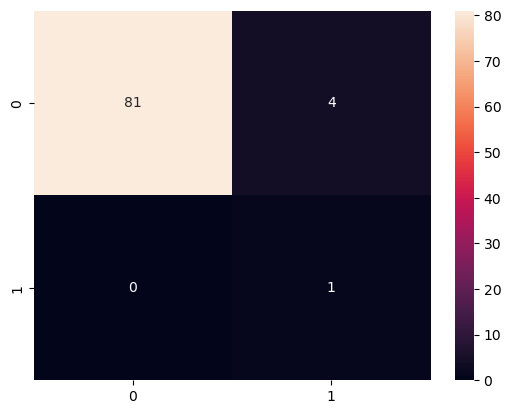

In [25]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.show()

## Decision Tree

In [26]:
model_decision_tree = DecisionTreeClassifier(max_depth=100)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100)

In [27]:
result_train = model_decision_tree.score(X_train, y_train)
result_train

0.9985422740524781

In [28]:
result_test = model_decision_tree.score(X_test, y_test)
result_test

0.8953488372093024

In [29]:
y_predict = model_decision_tree.predict(X_test)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94        81
         1.0       0.17      0.20      0.18         5

    accuracy                           0.90        86
   macro avg       0.56      0.57      0.56        86
weighted avg       0.90      0.90      0.90        86



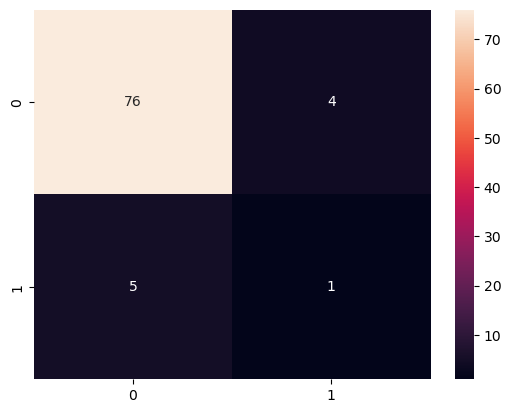

In [31]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.show()

## Random Forest

In [32]:
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=50)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50)

In [33]:
result_train = model_random_forest.score(X_train, y_train)
result_train

0.9985422740524781

In [34]:
result_test = model_random_forest.score(X_test, y_test)
result_test

0.9302325581395349

In [35]:
y_predict = model_random_forest.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        81
         1.0       0.00      0.00      0.00         5

    accuracy                           0.93        86
   macro avg       0.47      0.49      0.48        86
weighted avg       0.89      0.93      0.91        86



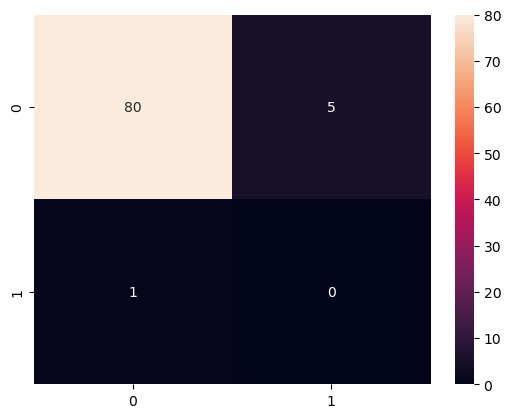

In [37]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.show()

## Support Vector Machine

In [38]:
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
model_svm.fit(X_train, y_train)

SVC()

In [39]:
result_train = model_svm.score(X_train, y_train)
result_train

0.9402332361516035

In [40]:
result_test = model_svm.score(X_test, y_test)
result_test

0.9418604651162791

In [41]:
y_predict = model_svm.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        81
         1.0       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86



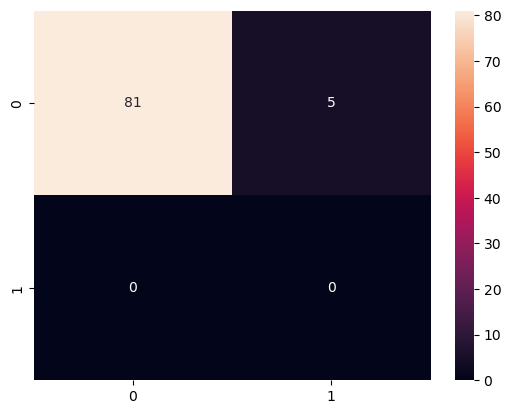

In [43]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.show()

## K-Nearest Neighbors

In [44]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
result_train = model_knn.score(X_train, y_train)
result_train

0.9373177842565598

In [46]:
result_test = model_knn.score(X_test, y_test)
result_test

0.9418604651162791

In [47]:
y_predict = model_knn.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        81
         1.0       0.00      0.00      0.00         5

    accuracy                           0.94        86
   macro avg       0.47      0.50      0.49        86
weighted avg       0.89      0.94      0.91        86



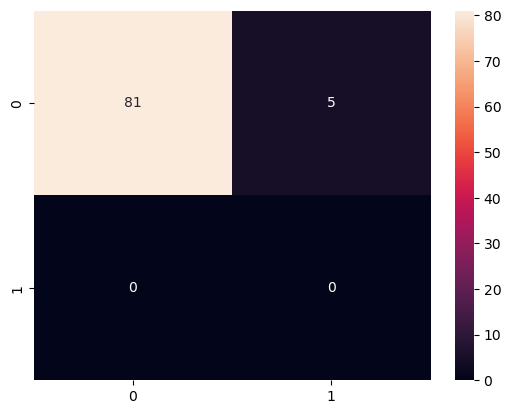

In [49]:
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.show()

In [50]:
models = [model_xgb, model_decision_tree, model_random_forest, model_svm, model_knn]
model_names = ['XGBoost', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = []

for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

accuracy_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
accuracy_df

,Model,Accuracy
0,XGBoost,0.953488
1,Decision Tree,0.895349
2,Random Forest,0.930233
3,SVM,0.941860
4,KNN,0.941860
